### Setup notebook

In [ ]:
COLAB = True
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import sys
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
else:
    directory = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Let's start building

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Let's have a quick look at the statistics of the data

In [ ]:
# import
import pandas as pd
import json
from google.colab import drive
if COLAB:
    path = directory + 'data/'
    predict_days_t = pd.read_pickle(path + 'predict_days_t.pkl')
predict_days_t

,username,followers,max_likes,rate_likes,max_comments,rate_comments,days_in_hashtag_top_section
post_url,,,,,,,
https://www.instagram.com/p/B-cuVYrJncn/,xxlexx007,4487,2283,53.093023,151,3.511628,36
https://www.instagram.com/p/B_CHJzXDeNF/,vinceropitini,4038,1109,31.685714,50,1.428571,33
https://www.instagram.com/p/B-_07jGpiWT/,squardes_,25000,506,14.055556,4,0.111111,29
https://www.instagram.com/p/B-xB_snKjld/,squardes_,25000,1758,41.857143,14,0.333333,29
https://www.instagram.com/p/B-9fgRUqRo5/,misfashionedsneakers,48600,20478,553.459459,31,0.837838,28
...,...,...,...,...,...,...,...
https://www.instagram.com/p/B_A0x6vlqb6/,oh.2x,37900,1365,50.555556,5,0.185185,0
https://www.instagram.com/p/B_O9cFuAgCb/,oh.2x,37900,718,34.190476,5,0.238095,0
https://www.instagram.com/p/B-7s7uhnD_v/,oh.2x,37900,1100,37.931034,0,0.000000,0


In [ ]:
# Count how many posts were never trending
freq = predict_days_t['days_in_hashtag_top_section'].value_counts()
total_count = len(predict_days_t.index)
print(freq.iloc[0]/total_count*100)

95.65180029217152


95.65% of the posts where never trending

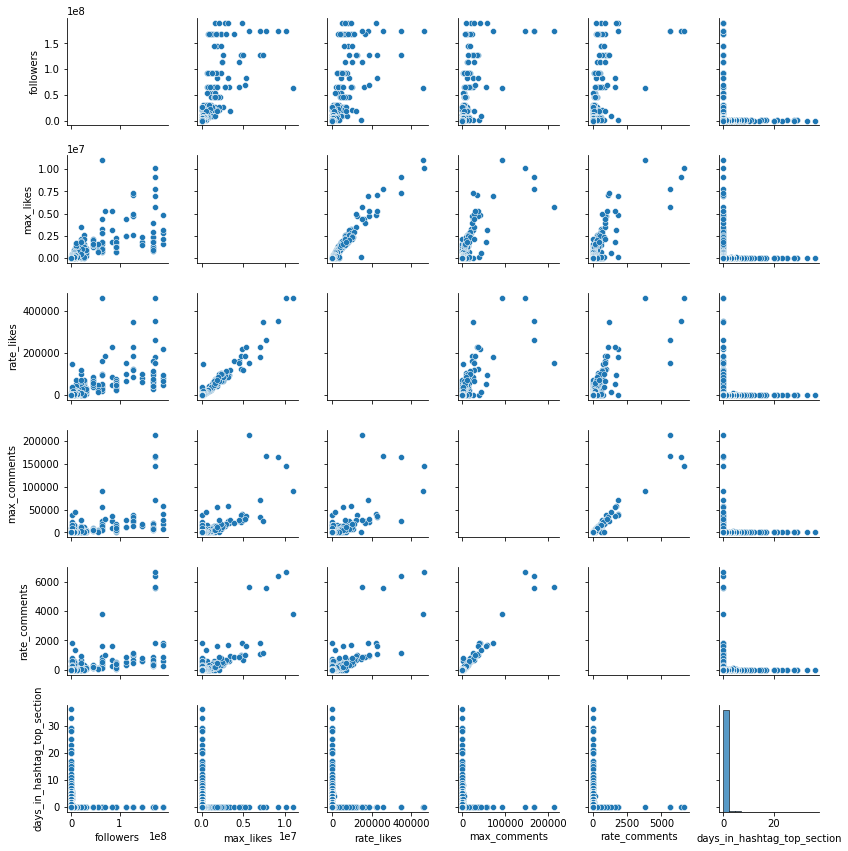

In [ ]:
# Examine the data
import seaborn as sns
cols = ['followers', 'max_likes', 'rate_likes', 'max_comments', 'rate_comments', 'days_in_hashtag_top_section']
sns.pairplot(predict_days_t[cols], height=2.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


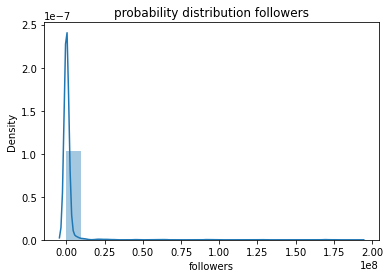

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


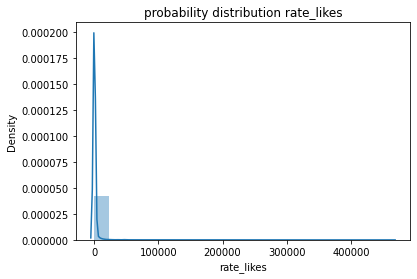

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


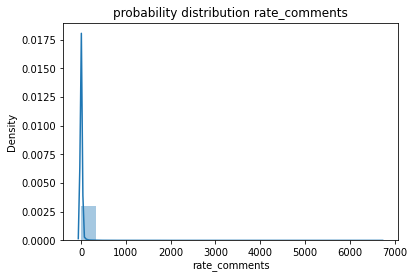

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


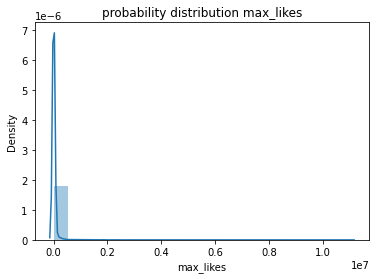

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


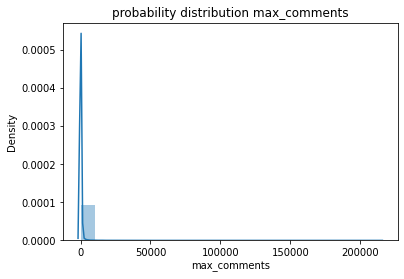

In [ ]:
# Calculate the probability distributions of the features

import matplotlib.pyplot as plt

# Prob dist followers
sns.distplot(predict_days_t['followers'],bins=20)
plt.title('probability distribution followers')
plt.show()

# Prob dist rate_likes
sns.distplot(predict_days_t['rate_likes'],bins=20)
plt.title('probability distribution rate_likes')
plt.show()

# Prob dist rate_comments
sns.distplot(predict_days_t['rate_comments'],bins=20)
plt.title('probability distribution rate_comments')
plt.show()

# Prob dist max_likes
sns.distplot(predict_days_t['max_likes'],bins=20)
plt.title('probability distribution max_likes')
plt.show()

# Prob dist max_comments
sns.distplot(predict_days_t['max_comments'],bins=20)
plt.title('probability distribution max_comments')
plt.show()

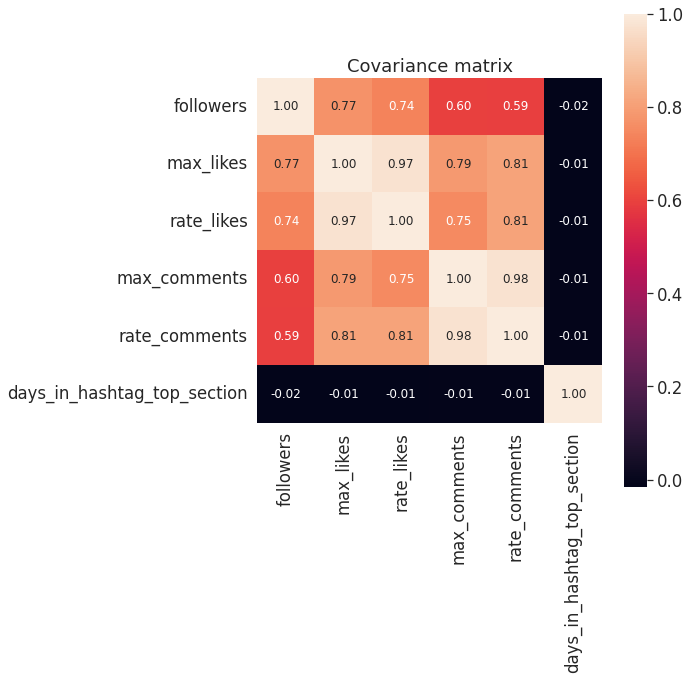

In [ ]:
# Calculate the covariance matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['followers', 'max_likes', 'rate_likes', 'max_comments', 'rate_comments', 'days_in_hashtag_top_section']

from sklearn.preprocessing import StandardScaler
# Standardize features
stdsc = StandardScaler()
X_std = stdsc.fit_transform(predict_days_t[cols].iloc[:,range(0,6)].values)

cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix')
plt.tight_layout()
plt.show()

### Let's one-hot encode the usernames

In [ ]:
predict_days_t

In [ ]:
# username can be considered a categorical feature

# Check the datatypes of the features
## print(df.dtypes)
# Make sure the categorical variables are of the correct type
categ_df = predict_days_t.copy()
categ_df['username'] = predict_days_t.username.astype('category')

# Get one hot encoding of columns B
one_hot = pd.get_dummies(categ_df['username'])

# Drop column B as it is now encoded
one_hot_df = predict_days_t.drop('username',axis = 1)

# Join the encoded df
one_hot_df = one_hot_df.join(one_hot)
one_hot_df

,followers,max_likes,rate_likes,max_comments,rate_comments,days_in_hashtag_top_section,064_steady,12_babu_05,1_nakayub1_9,1st.sholo,...,zapasrun,zaralarsson,zaramenmag,zaraynaf,zehvier,zendaya,zitawu,zoeygrossman,zoyaekhann,zuzik.son
post_url,,,,,,,,,,,,,,,,,,,,,
https://www.instagram.com/p/B-cuVYrJncn/,4487,2283,53.093023,151,3.511628,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_CHJzXDeNF/,4038,1109,31.685714,50,1.428571,33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-_07jGpiWT/,25000,506,14.055556,4,0.111111,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-xB_snKjld/,25000,1758,41.857143,14,0.333333,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-9fgRUqRo5/,48600,20478,553.459459,31,0.837838,28,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B_A0x6vlqb6/,37900,1365,50.555556,5,0.185185,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_O9cFuAgCb/,37900,718,34.190476,5,0.238095,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-7s7uhnD_v/,37900,1100,37.931034,0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# make days_in_hashtag_top_section the last column

cols = list(one_hot_df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('days_in_hashtag_top_section')) #Remove days_in_hashtag_top_section from list
one_hot_df = one_hot_df[cols+['days_in_hashtag_top_section']] #Create new dataframe with columns in the order you want
one_hot_df

,followers,max_likes,rate_likes,max_comments,rate_comments,064_steady,12_babu_05,1_nakayub1_9,1st.sholo,1zsoo,...,zaralarsson,zaramenmag,zaraynaf,zehvier,zendaya,zitawu,zoeygrossman,zoyaekhann,zuzik.son,days_in_hashtag_top_section
post_url,,,,,,,,,,,,,,,,,,,,,
https://www.instagram.com/p/B-cuVYrJncn/,4487,2283,53.093023,151,3.511628,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
https://www.instagram.com/p/B_CHJzXDeNF/,4038,1109,31.685714,50,1.428571,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
https://www.instagram.com/p/B-_07jGpiWT/,25000,506,14.055556,4,0.111111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
https://www.instagram.com/p/B-xB_snKjld/,25000,1758,41.857143,14,0.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
https://www.instagram.com/p/B-9fgRUqRo5/,48600,20478,553.459459,31,0.837838,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B_A0x6vlqb6/,37900,1365,50.555556,5,0.185185,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_O9cFuAgCb/,37900,718,34.190476,5,0.238095,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-7s7uhnD_v/,37900,1100,37.931034,0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# export one hot encoding dataset
import json
from google.colab import drive
if COLAB:
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
    one_hot_df.to_pickle(directory + 'data_predict_num_days_trending/one_hot_df.pkl')


### Calculate the account which has the largest total of days trending

In [ ]:
# Check how many posts by username

# Make sure the categorical variables are of the correct type
categ_df = predict_days_t.copy()
categ_df['username'] = predict_days_t.username.astype('category')
print(categ_df['username'].value_counts())

misslolaofficial    86
doublebreaste       82
thestreetgeek_      70
culturfits          60
purplerang          59
                    ..
danielcichosz        1
naazzz25             1
velvetmode           1
mariah_noelle        1
lucaskastberg        1
Name: username, Length: 1301, dtype: int64


In total there were 1301 usernames, with misslolaofficial having the most posts (86).

In [ ]:
# count total number of days trending by username
top_usernames = categ_df.groupby('username').sum().sort_values(by=["days_in_hashtag_top_section"], axis=0, ascending=False)

In [ ]:
top_5_usernames = list(top_usernames[:5].index)

In [ ]:
# Display the relationship between days_in_hashtag_top_section and the username being squardes_
plt.scatter(one_hot_df['squardes_'], one_hot_df['days_in_hashtag_top_section'])
plt.xlabel('squardes_')
plt.ylabel('days_in_hashtag_top_section')
plt.show()

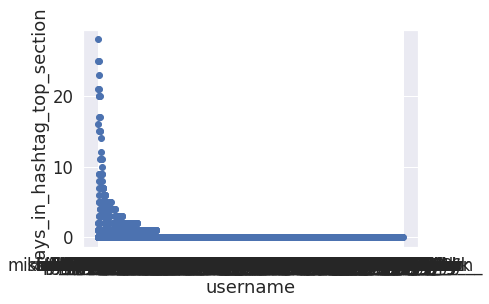

In [ ]:
plt.scatter(categ_df['username'][5:], categ_df['days_in_hashtag_top_section'][5:])
plt.xlabel('username')
plt.ylabel('days_in_hashtag_top_section')
plt.show()

### Calculate covariance matrix using usernames

In [ ]:
# import train dataset
import json
import pandas as pd
from google.colab import drive
if COLAB:
    train_dataset = pd.read_pickle(directory + 'data_predict_num_days_trending/train_dataset.pkl')

In [ ]:
train_dataset.sort_values(by=["days_in_hashtag_top_section"], axis=0, ascending=False)[:5]
print(top_5_usernames)
top_5_usernames.append("days_in_hashtag_top_section")
print(top_5_usernames)

['squardes_', 'misfashionedsneakers', 'd.ave.y', 'urbanculturs', 'pierre.laurent', 'days_in_hashtag_top_section', 'days_in_hashtag_top_section', 'days_in_hashtag_top_section']
['squardes_', 'misfashionedsneakers', 'd.ave.y', 'urbanculturs', 'pierre.laurent', 'days_in_hashtag_top_section', 'days_in_hashtag_top_section', 'days_in_hashtag_top_section', 'days_in_hashtag_top_section']


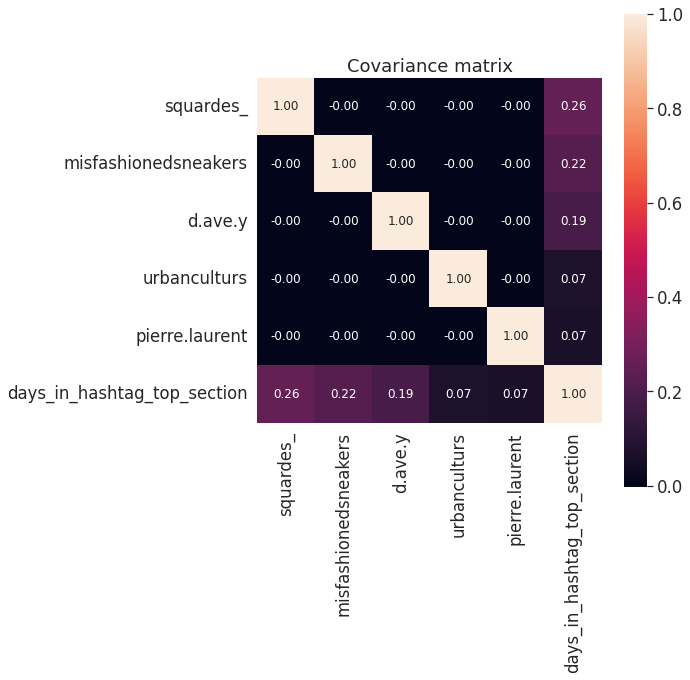

In [ ]:
# Calculate the covariance matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['squardes_', 'misfashionedsneakers', 'd.ave.y', 'urbanculturs', 'pierre.laurent', 'days_in_hashtag_top_section']

from sklearn.preprocessing import StandardScaler
# Standardize features
stdsc = StandardScaler()
X_std = stdsc.fit_transform(train_dataset[cols].iloc[:].values)

cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix')
plt.tight_layout()
plt.show()

## Let's train

### Create the split between train and test dataset

In [ ]:
# import train dataset
import json
import pandas as pd
from google.colab import drive
if COLAB:
    train_dataset = pd.read_pickle(directory + 'data_predict_num_days_trending/one_hot_df.pkl')

In [ ]:
# First we're going to split the training and test datasets and not touch the test data
from sklearn.model_selection import train_test_split

# 30% for testing
train_dataset, test_dataset = train_test_split(one_hot_df, test_size=0.3, random_state=100)
test_dataset

NameError: ignored

In [ ]:
# export train and test datasets
import json
from google.colab import drive
if COLAB:
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
    test_dataset.to_pickle(directory + 'data_predict_num_days_trending/test_dataset.pkl')
    train_dataset.to_pickle(directory + 'data_predict_num_days_trending/train_dataset.pkl')


### We're now going to decide what type of ML model to chose

In [ ]:
COLAB = True
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import sys
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
else:
    directory = ""

Mounted at /content/drive


In [ ]:
# import train dataset
import json
import pandas as pd
from google.colab import drive
if COLAB:
    train_dataset = pd.read_pickle(directory + 'data_predict_num_days_trending/train_dataset.pkl')

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataframe into the features and the predicted values
X = train_dataset.iloc[:, :-1]
y = train_dataset['days_in_hashtag_top_section']
X

,followers,max_likes,rate_likes,max_comments,rate_comments,064_steady,12_babu_05,1_nakayub1_9,1st.sholo,1zsoo,...,zapasrun,zaralarsson,zaramenmag,zaraynaf,zehvier,zendaya,zitawu,zoeygrossman,zoyaekhann,zuzik.son
post_url,,,,,,,,,,,,,,,,,,,,,
https://www.instagram.com/p/B-eKaxMAaOy/,68500,11309,282.725000,130,3.250000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_Mc7vKJO4e/,4600000,78000,3545.454545,3951,179.590909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_EP1vCgZX4/,72400,1475,59.000000,0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-9pZ5KndBW/,165000,1371,48.964286,13,0.464286,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-7tw7FpSi5/,214000,96678,3333.724138,645,22.241379,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B_F5Np-pOl4/,28400,577,23.080000,18,0.720000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_PY7w6ClSp/,476000,3743,178.238095,83,3.952381,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
https://www.instagram.com/p/B_U7rn6Ib5G/,3882,1058,55.684211,157,8.263158,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In order to measure the performance of a model we are going to use adjusted R-squared, but before we explain what is, first let's explain:

**What is R-squared?**

$\text{R-squared}= \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$

SST is the total variation of actual values from the mean of the Y's (the response variables).

SSR is the total variation of the all the predicted values (found on the regression line) from the mean value of the Y's (the mean of the Y value of all the blue dots).

R-squared is used to measure the goodness of fit. The greater R-squared the better the model as most of the variation of the actual values from the mean (SST) is explained by the model (SSR).

However, we need to be careful when using R-squared to estimate the performance.

For the training dataset R-squared is bounded between 0 and 1, but it can become negative for the test dataset if the SSE is greater than the SST (this occurs when the fit is actually worse than just fitting a horizontal line e.g Y = 5.)

If the R-squared value is equal to 1, it means that the model fits the data perfectly.

**What is the difference between R-squared and MSE (Mean Squared Error)?**

MSE is the average sum of the squared difference between the actual value and the predicted value.

The difference is that MSE varies depending on whether the data is scaled or not. For example, if the number of days trending is a multiple of 10, MSE will be lower than when the number of days is its actual value. R-squared represents the fraction of variance of the actual values of Y captured by the model.

$\text{R-squared}= 1 - \frac{MSE}{Var(y)}$

**Why do we use R-squared over MSE?**

R-squared tends to give a better picture of the quality of the model by representing the fraction of the variance of the actual values that the model captures. Also, MSE differs depending on whether Y is scaled or not.

Another advantage, is that R-squared is scaled between 0 and 1 so it is easier to compare the performance. Whereas, with MSE it has no upper limit.

**What is Adjusted R-squared?**

We can actually go further and use the adjusted R-squared value to measure performance.
The adjusted R-squared is the proportion of the variance explained by the model while taking into account the number of predictor variables and the number of samples used. The adjusted R-squared only increases when adding an additional variable to the model improves its predictive capability more than expected by chance alone.


$\text{Adjusted R-squared}= 1 - \frac{SSE/df_{\text{model}}}{SST/df_{\text{mean model}}} = 1 - \frac{(1 - R^2)(N - 1)}{N - p -1}$

Where $df_{\text{model}}$ is the degrees of freedom of the model: $N - P -1$ where $P$ is the number of predictor variables and $N$ is the number of samples.

And $df_{\text{mean model}}$ is the degrees of freedom of the model representing the mean of the values of the Y (the dashed horizontal line): $N - 1$.

The advantage of using adjusted R-squared over R-squared is because it takes into account the number of predictor variables so it penalises overfitting. Adding a predictor variable will increase the value of R-squared but not necessarily that of adjusted R-squared.

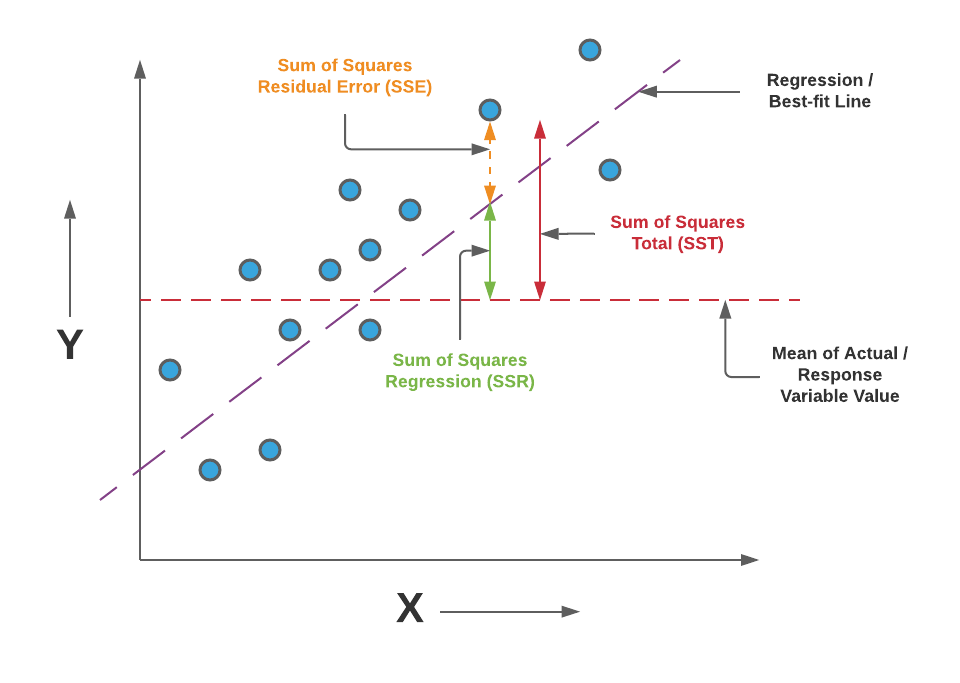

#### Adjusted R-squared function

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

def adjr2(actual: np.ndarray, predicted: np.ndarray, rowcount: np.int, featurecount: np.int):
    """ Adjusted R2 Score """
    return 1-(1-r2_score(actual,predicted))*(rowcount-1)/(rowcount-featurecount)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


#### Simple model selection

In [ ]:
# Split it into training and validation datasets to check which model to use
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=100)
X_train

,followers,max_likes,rate_likes,max_comments,rate_comments,064_steady,12_babu_05,1_nakayub1_9,1st.sholo,1zsoo,...,zapasrun,zaralarsson,zaramenmag,zaraynaf,zehvier,zendaya,zitawu,zoeygrossman,zoyaekhann,zuzik.son
post_url,,,,,,,,,,,,,,,,,,,,,
https://www.instagram.com/p/B--bGAUhf67/,4600000,39318,1404.214286,2800,100.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-mhHJpHqD4/,14600,222,6.000000,11,0.297297,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-_S7IpjzJv/,15200,48,1.777778,0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-7FiN8JvkF/,106000,3818,131.655172,143,4.931034,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_H0tLVqCSO/,22700,1216,50.666667,17,0.708333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B-6-lEFF0fx/,74400,1982,68.344828,176,6.068966,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_VOTYWAhfj/,3400000,26622,1401.157895,747,39.315789,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-6wtPmAc-T/,5921,540,18.620690,73,2.517241,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# We are going to use r2_score to measure the model's performance
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

def model_performance(model):
    sc_y = StandardScaler()
    sc_x = StandardScaler()
    y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    pipe_lr = Pipeline([('scl', StandardScaler()), ('model', model)])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_val_pred_std=pipe_lr.predict(X_val)

    y_train_pred=sc_y.inverse_transform(y_train_pred_std.reshape(-1, 1))
    y_val_pred=sc_y.inverse_transform(y_val_pred_std.reshape(-1, 1))

    print("adjr2: ", adjr2(y_train, y_train_pred, len(y_train), X_train.shape[1]))

We now test the performance for 6 different types of models

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

""" It crashes if I do a degree higher than 1 as it uses all the RAM
# 1. Polynomial regression 3-degree
print("Polynomial regression 3-degree")
model_1 = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                    ('linear', LinearRegression(fit_intercept=False))])
model_performance(model_1)
print()
"""
# 2. Linear regression
print("Linear regression")
model_linear = LinearRegression(fit_intercept=False)
model_performance(model_linear)
print()

# 3. Support Vector Regression
print("Support Vector Regression")
from sklearn import svm

model_3 = svm.SVR()
model_performance(model_3)
print()

# 4. Nu Support Vector Regression
print("Nu Support Vector Regression")
from sklearn import svm

model_4 = svm.NuSVR()
model_performance(model_4)
print()

# 5. Linear model fitted by minimizing a regularized empirical loss with SGD.
print("SGD")
from sklearn.linear_model import SGDRegressor

model_5 = SGDRegressor()
model_performance(model_5)
print()

# 6. Multi-layer Perceptron regressor.
print("Multi-layer Perceptron regressor")
from sklearn.neural_network import MLPRegressor

model_6 = MLPRegressor(hidden_layer_sizes=(1,)) # , activation='identity', alpha=0.01, learning_rate='adaptive'))])
model_performance(model_6)
print()

Linear regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


adjr2:  0.15926773573429975

Support Vector Regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


adjr2:  -0.12817362637007235

Nu Support Vector Regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


adjr2:  -0.1339233327052205

SGD


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


adjr2:  -17289068.278992336

Multi-layer Perceptron regressor


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


adjr2:  0.1532314003883095



The linear regression model expressed as:

$$ \hat{y}_{i} = w_0 + \sum_{j=1}^{1306} X_{ij} w_j $$

#### Perform cross validation

Let's perform cross validation to make sure the performance metrics are more precise.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

def cross_validation_10(pipe_lr):
    sc_y = StandardScaler()
    sc_x = StandardScaler()
    y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
    
    train_score = []
    val_score = []

    for i in range(1, 100, 10):
        # 10-fold cross validation
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=i)
        y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

        pipe_lr.fit(X_train, y_train_std)
        y_train_pred_std=pipe_lr.predict(X_train)
        y_val_pred_std=pipe_lr.predict(X_val)

        y_train_pred=sc_y.inverse_transform(y_train_pred_std.reshape(-1, 1))
        y_val_pred=sc_y.inverse_transform(y_val_pred_std.reshape(-1, 1))

        train_score = np.append(train_score, adjr2(y_train, y_train_pred, len(y_train), X_train.shape[1]))
        val_score = np.append(val_score, adjr2(y_train, y_train_pred, len(y_train), X_train.shape[1]))
    
    print("train_score", train_score)
    print("train_score mean:", train_score.mean())
    print("val_score", val_score)
    print("val_score mean:", val_score.mean())
    return train_score.mean(), val_score.mean()


We now perform the cross validation on the five models we're testing

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

""" It crashes if I do a degree higher than 1 as it uses all the RAM
# 1. Polynomial regression 3-degree
print("Polynomial regression 3-degree")
model_1 = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                    ('linear', LinearRegression(fit_intercept=False))])
model_performance(model_1)
print()
"""
train_score_models = []
val_score_models = []
model_name = []

# 2. Linear regression
print("Linear regression")
model_name.append("linear")
pipe_lr = Pipeline([('scl', StandardScaler()), ('model', LinearRegression(fit_intercept=False))])
ts, vs = cross_validation_10(pipe_lr)
train_score_models.append(ts)
val_score_models.append(vs)
print()

# 3. Support Vector Regression
print("Support Vector Regression")
model_name.append("SVR")
from sklearn import svm

pipe_lr = Pipeline([('scl', StandardScaler()), ('model', svm.SVR())])
train_score_models.append(ts)
val_score_models.append(vs)
print()

# 4. Nu Support Vector Regression
print("Nu Support Vector Regression")
model_name.append("Nu SVR")
from sklearn import svm

pipe_lr = Pipeline([('scl', StandardScaler()), ('model', svm.NuSVR())])
ts, vs = cross_validation_10(pipe_lr)
train_score_models.append(ts)
val_score_models.append(vs)
print()

# 5. Linear model fitted by minimizing a regularized empirical loss with SGD.
print("SGD")
model_name.append("SGD")
from sklearn.linear_model import SGDRegressor

pipe_lr = Pipeline([('scl', StandardScaler()), ('model', SGDRegressor())])
ts, vs = cross_validation_10(pipe_lr)
train_score_models.append(ts)
val_score_models.append(vs)
print()

# 6. Multi-layer Perceptron regressor.
print("Multi-layer Perceptron regressor")
model_name.append("MLP")
from sklearn.neural_network import MLPRegressor

pipe_lr = Pipeline([('scl', StandardScaler()), ('model', MLPRegressor(hidden_layer_sizes=(1,)))])
ts, vs = cross_validation_10(pipe_lr)
train_score_models.append(ts)
val_score_models.append(vs)
print()



Linear regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

train_score [0.32955786 0.43667995 0.46273353 0.45235574 0.46140487 0.36403369
 0.345922   0.44778305 0.37395652 0.41294884]
train_score mean: 0.40873760570968487
val_score [-4.64467666e+23 -5.12073322e+22 -3.92858393e+22 -6.40401216e+23
 -2.70319577e+23 -9.88512956e+23 -1.64771878e+23 -4.23405923e+22
 -1.43021085e+23 -2.12108902e+23]
val_score mean: -3.016437044408914e+23

Support Vector Regression

Nu Support Vector Regression


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

train_score [0.09043084 0.11499826 0.10003623 0.09592168 0.11391588 0.07233825
 0.12316949 0.10207547 0.07044095 0.07743084]
train_score mean: 0.09607578878301712
val_score [0.01530191 0.03988878 0.02420308 0.05783711 0.0516142  0.02966347
 0.02505886 0.0546198  0.04605642 0.08967124]
val_score mean: 0.04339148662308717

SGD


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

train_score [-3.54940617e+09 -8.95586799e+10 -1.72558350e+07 -2.06234961e+07
 -1.69621338e+12 -4.09782913e+14 -6.06374397e+14 -5.91970667e+10
 -5.94350273e+08 -1.34406205e+07]
train_score mean: -101800647434457.6
val_score [-2.00439145e+09 -2.47824227e+11 -2.73774594e+06 -2.63044301e+07
 -3.79710479e+12 -2.86505497e+14 -2.03738789e+14 -2.48016421e+11
 -1.07403861e+09 -1.48709707e+06]
val_score mean: -49454034116584.42

Multi-layer Perceptron regressor


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

train_score [ 3.27302676e-04 -1.01938893e-04  4.57263684e-01  4.22891706e-01
 -1.72284903e-04  1.35218878e-02  2.08086245e-02 -2.26456254e-04
  3.57909386e-01  1.64326211e-02]
train_score mean: 0.12886545328438634
val_score [-2.29800299e-03 -1.77161816e-04  5.23539441e-02  4.02136260e-02
 -8.24573854e-04  5.04793573e-04  1.17268367e-02  3.98396368e-06
 -4.04484730e-03  7.49895113e-03]
val_score mean: 0.010495754953064628



##### Save Scores

In [ ]:
print(train_score_models)
print(val_score_models)
print(model_name)

scores = dict()
for i, name in enumerate(model_name):
    scores[name] = (train_score_models[i], val_score_models[i])
print(scores)

[0.40873760570968487, 0.40873760570968487, 0.09607578878301712, -101800647434457.6, 0.12886545328438634]
[-3.016437044408914e+23, -3.016437044408914e+23, 0.04339148662308717, -49454034116584.42, 0.010495754953064628]
['linear', 'SVR', 'Nu SVR', 'SGD', 'MLP']
{'linear': (0.40873760570968487, -3.016437044408914e+23), 'SVR': (0.40873760570968487, -3.016437044408914e+23), 'Nu SVR': (0.09607578878301712, 0.04339148662308717), 'SGD': (-101800647434457.6, -49454034116584.42), 'MLP': (0.12886545328438634, 0.010495754953064628)}


In [ ]:
# export
from google.colab import drive
import pickle

if COLAB:
    path = directory + 'scores_predict_num_days/'
    with open(path + 'adjr2.pkl', 'wb') as f:
        pickle.dump(scores, f)

##### Plot scores

In [ ]:
# import scores
from google.colab import drive
import pickle

if COLAB:
    path = directory + 'scores_predict_num_days/'
    scores = pd.read_pickle(path + 'adjr2.pkl')
scores

{'MLP': (0.12886545328438634, 0.010495754953064628),
 'Nu SVR': (0.09607578878301712, 0.04339148662308717),
 'SGD': (-101800647434457.6, -49454034116584.42),
 'SVR': (0.40873760570968487, -3.016437044408914e+23),
 'linear': (0.40873760570968487, -3.016437044408914e+23)}

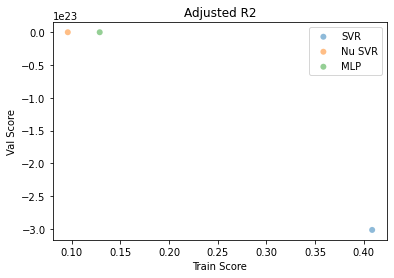

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lets exclude the linear and the SGD model as they clearly has a very high validation score

fig, ax = plt.subplots()
ax.set_title("Adjusted R2")
ax.set_xlabel("Train Score")
ax.set_ylabel("Val Score")
for name, (ts, vs) in scores.items():
    if name is "linear" or name is "SGD":
       continue
    
    ax.scatter(x=ts, y=vs, label=name,  alpha=0.5, edgecolors='none')
    # ax.annotate((ts, vs), (ts, vs))
ax.legend()
plt.show()

From this graph we can clearly see that the MLP performs the best as we are interested in the valdation score more that the training score

#### Fit the linear regression model

In [ ]:
# Train the model on the training dataset
model_linear.fit(X_train, y_train)
y_train_pred = model_linear.predict(X_train)
y_val_pred = model_linear.predict(X_val)


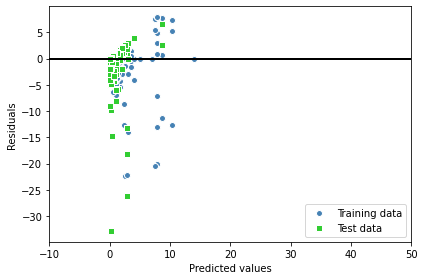

In [ ]:
# Plot the predicted values agains the residuals
import matplotlib.pyplot as plt
## Plot the predicted values of the training dataset
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
## Plot the predicted values of the test dataset
plt.scatter(y_val_pred,  y_val_pred - y_val,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

##### Evaluate Linear Regression

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE: train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred)))
print('R^2: train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred)))

MSE: train: 0.789, test: 2.060
R^2: train: 0.357, test: 0.091


##### Calculate the regression coefficients

In [ ]:
intercept = model_linear.fit(X_train, y_train)['linear'].intercept_
coeff = model_linear.fit(X_train, y_train)['linear'].coef_

print("intercept", intercept)
print("coeff", coeff)

intercept 0.0
coeff [ 1.71361414e-01 -3.10994235e-09  2.10364402e-07 ... -1.71041499e-01
 -1.71092412e-01 -1.71100974e-01]


### Introduce Principal Component Analysis

Currently we have 1306 features one possible avenue could be to reduce the size of the feature also known as dimensionality reduction.

PCA is used for dimensionality reduction.
There are two possible ways to do this:
* Linear methods (PCA)
* Non-linear methods (Manifold learning)

PCA transforms a set of correlated variables ($p$) into a smaller ($k \ < \ p$) number of uncorrelated variables called principal components while retaining as much of the variation in the original dataset as possible.

**How does PCA work?**

If the correlation is very high among a subset of the features, PCA will attempt to combine the highly correlated features and represent this data with a smaller number of linearly uncorrelated features. The algorithm keeps performing this correlation reduction, finding the directions of maximum variance in the original high-dimensional data and projecting them onto a smaller dimensional space.

*Note:* Very important to perform standardise the features before performing PCA

The objective is that with a model with a lower number of features (i.e. a simpler model), the performance will improve.

In [ ]:
COLAB = True
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import sys
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
else:
    directory = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import
import json
import pandas as pd
from google.colab import drive
if COLAB:
    train_dataset = pd.read_pickle(directory + 'data_predict_num_days_trending/train_dataset.pkl')
from sklearn.model_selection import train_test_split

# Divide the dataframe into the features and the predicted values
X = train_dataset.iloc[:, :-1]
y = train_dataset['days_in_hashtag_top_section']

# Split it into training and validation datasets to check which model to use
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=100)
X_train

,followers,max_likes,rate_likes,max_comments,rate_comments,064_steady,12_babu_05,1_nakayub1_9,1st.sholo,1zsoo,...,zapasrun,zaralarsson,zaramenmag,zaraynaf,zehvier,zendaya,zitawu,zoeygrossman,zoyaekhann,zuzik.son
post_url,,,,,,,,,,,,,,,,,,,,,
https://www.instagram.com/p/B--bGAUhf67/,4600000,39318,1404.214286,2800,100.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-mhHJpHqD4/,14600,222,6.000000,11,0.297297,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-_S7IpjzJv/,15200,48,1.777778,0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-7FiN8JvkF/,106000,3818,131.655172,143,4.931034,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_H0tLVqCSO/,22700,1216,50.666667,17,0.708333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B-6-lEFF0fx/,74400,1982,68.344828,176,6.068966,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_VOTYWAhfj/,3400000,26622,1401.157895,747,39.315789,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-6wtPmAc-T/,5921,540,18.620690,73,2.517241,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Test for different number of components of PCA

First, we are going to find the number of components that produces the best performance. We are going to test this on our best performing model from the section above, the multi-layer perceptron.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

sc_x = StandardScaler()
sc_y = StandardScaler()

train_score = []
val_score = []
cum_variance = []

X_train_val = X_train
y_train_val = y_train
X_val_test = X_val
y_val_test = y_val

for i in range(1, 130):
    print("n_components", i)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=100)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),('model', MLPRegressor(hidden_layer_sizes=(1,)))])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std = pipe_lr.predict(X_train)
    y_val_pred_std = pipe_lr.predict(X_val)

    y_train_pred = sc_y.inverse_transform(y_train_pred_std.reshape(-1, 1))
    y_val_pred = sc_y.inverse_transform(y_val_pred_std.reshape(-1, 1))

    train_score = np.append(train_score, adjr2(y_train, y_train_pred, len(y_train), X_train.shape[1]))
    val_score = np.append(val_score, adjr2(y_train, y_train_pred, len(y_train), X_train.shape[1]))
    cum_variance = np.append(cum_variance, np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))

print("train_score: ", train_score)
print("val_score: ", val_score)
print("cum_variance: ", cum_variance)

n_components 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 16


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 17


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 19


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 24


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 26


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 27


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 28


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 29


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 31
n_components 32


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 33


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 34


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 36


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 37


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 38


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 41


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 42


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 43


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 44


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 45


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 46


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 47


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 48


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 49


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 51


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 52


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 53
n_components 54


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 55


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 56


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 57


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 58


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 59


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 61


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 62


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 63


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 65


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 66


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 67
n_components 68


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 69


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 70


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 71


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 72


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 73


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 74


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 76


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 77


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 78
n_components 79


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 80


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 81


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 82


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 83


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 84


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 85


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 86


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 87


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 88


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 89


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 90


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 91


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 92


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 93


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 94


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 95


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 96


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 97


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 98


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 99


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 100


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 101


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 102


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 103


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 104


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 105


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 106


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 107
n_components 108


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 109


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 110


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 111


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 112


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 113
n_components 114


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 115


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 116


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 117


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 118


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 119


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 120


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 121
n_components 122


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 123


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 124


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 125
n_components 126


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


n_components 127


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 128


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


n_components 129


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


train_score:  [-35.90664488  -8.20710587  -8.21026894  -8.40418547  -8.91839882
 -10.58765918  -8.3588934   -8.32424681  -8.11523393  -8.3637123
  -8.14708657  -8.85326535  -8.00675558  -8.79673249  -8.392638
  -8.22318373  -7.99805857  -8.18981334  -8.6419151  -10.4719251
  -8.1302061   -8.22219939  -8.08492023  -8.49155868  -8.09676392
  -8.3519407   -8.05275885  -8.23833958  -8.02637     -8.03939383
  -8.18084209  -8.44434143  -8.10587035  -8.00919342  -7.96361208
  -9.34433061  -9.35856142  -8.1402258   -8.17042131  -8.72190944
  -8.14803114  -8.22241271  -8.20462415  -7.61159279  -8.24586647
  -9.58171919  -7.51629708  -7.77906417  -7.88040859  -8.28372043
  -8.14697192  -8.95673568  -8.20989508  -7.24053919  -7.70741154
  -7.62418101  -7.50870241  -8.00665658  -7.97766957 -10.49417118
  -7.93300053  -7.20429831  -8.30826225  -7.73486398  -7.8993114
  -7.8931171   -8.17727888  -7.85229068  -7.2535999   -7.97870824
  -7.81016288  -7.25857907  -7.57042878  -7.21118847  -7.75748953
 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
n_comp_max_train_score = train_score.argmax(axis=0) + 1 # Because first position has index 0
print(n_comp_max_train_score)
n_comp_max_val_score = val_score.argmax(axis=0) + 1 # Because first position has index 0
print(n_comp_max_val_score)

124
124


Therefore the optimum number of components is: 124

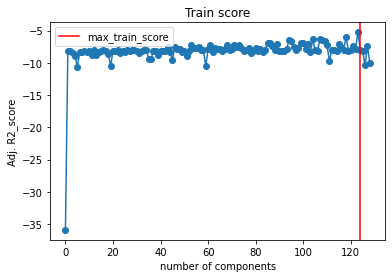

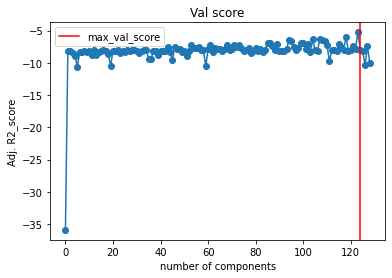

In [ ]:
# Plot the scores
import matplotlib.pyplot as plt
import numpy as np

plt.title("Train score")
plt.scatter(x=range(len(train_score)), y=train_score)
plt.plot(train_score)
plt.axvline(n_comp_max_train_score, color="red", label="max_train_score")
plt.xlabel('number of components')
plt.ylabel('Adj. R2_score')
plt.legend()
plt.show()


TypeError: ignored

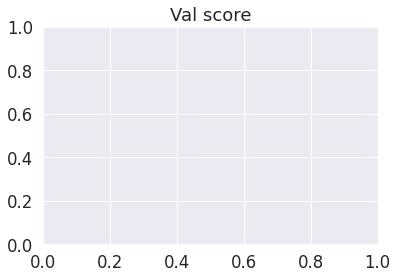

In [ ]:
plt.title("Val score")
plt.scatter(x=range(len(n_comp_adjr2.keys())), y=n_comp_adjr2.values()[1])
plt.plot(n_comp_adjr2[1])
plt.axvline(n_comp_max_val_score, color="red", label="max_val_score")
plt.xlabel('number of components')
plt.ylabel('Adj. R2_score')
plt.legend()
plt.show()

We observe that by increasing the number of principal components from 1 to 130, the train and validation scores improve at the beginning. This is because with less components, there is high bias error in the model, since model is overly simplified. As we increase the number of principal components, the bias error will reduce, but complexity in the model increases. However, if we increase the number of components by too much the model becomes too complex and overfits, hence why the adjustd R2 score decreases after 124 components.

Because we are interested in the performance of an unseen dataset we want to get the best performing model on the validation dataset.

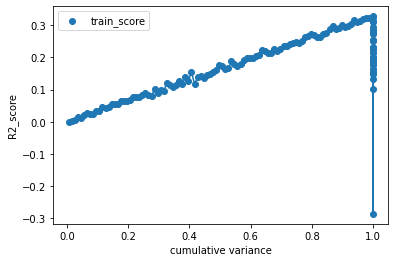

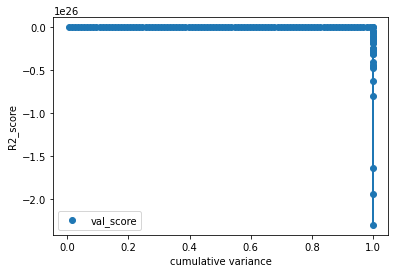

In [ ]:
plt.scatter(cum_variance, train_score, label = 'train_score')
plt.plot(cum_variance, train_score)
plt.xlabel('cumulative variance')
plt.ylabel('R2_score')
plt.legend()
plt.show()
plt.scatter(cum_variance, val_score, label = 'val_score')
plt.plot(cum_variance, val_score)
plt.xlabel('cumulative variance')
plt.ylabel('R2_score')
plt.legend()
plt.show()

##### Save Scores

In [ ]:
scores = dict()
for i in range(len(train_score)):
    scores[i] = (train_score[i], val_score[i])
print(scores)

{0: (-35.90664488026314, -35.90664488026314), 1: (-8.207105868324605, -8.207105868324605), 2: (-8.210268937800702, -8.210268937800702), 3: (-8.404185468292697, -8.404185468292697), 4: (-8.918398816869834, -8.918398816869834), 5: (-10.587659175432494, -10.587659175432494), 6: (-8.358893399090164, -8.358893399090164), 7: (-8.3242468129688, -8.3242468129688), 8: (-8.115233928106969, -8.115233928106969), 9: (-8.363712301544973, -8.363712301544973), 10: (-8.1470865720828, -8.1470865720828), 11: (-8.853265346302567, -8.853265346302567), 12: (-8.006755575956463, -8.006755575956463), 13: (-8.796732489841753, -8.796732489841753), 14: (-8.392638000237097, -8.392638000237097), 15: (-8.223183732355357, -8.223183732355357), 16: (-7.998058573080989, -7.998058573080989), 17: (-8.189813340728357, -8.189813340728357), 18: (-8.641915102900464, -8.641915102900464), 19: (-10.471925101945644, -10.471925101945644), 20: (-8.1302060953516, -8.1302060953516), 21: (-8.222199387228228, -8.222199387228228), 22: (

In [ ]:
from google.colab import drive
import pickle

if COLAB:
    path = directory + 'scores_predict_num_days/'
    with open(path + 'n_comp_adjr2.pkl', 'wb') as f:
        pickle.dump(scores, f)

##### Plot Score of Adj R2 vs Adj R2 (n_comp=124)

In [ ]:
# import scores
import json
import pandas as pd
from google.colab import drive

if COLAB:
    adjr2_scores = pd.read_pickle(directory + 'scores_predict_num_days/adjr2.pkl')
    n_comp_adjr2 = pd.read_pickle(directory + 'scores_predict_num_days/n_comp_adjr2.pkl')

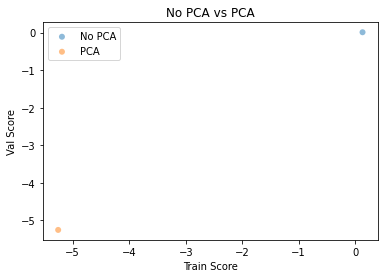

Adj R^2 no PCA: 0.010495754953064628
Adj R^2 PCA: -5.258221678543818


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lets exclude the linear and the SGD model as they clearly has a very high validation score

fig, ax = plt.subplots()
ax.set_title("No PCA vs PCA")
ax.set_xlabel("Train Score")
ax.set_ylabel("Val Score")
ax.scatter(x=adjr2_scores["MLP"][0], y=adjr2_scores["MLP"][1], label="No PCA",  alpha=0.5, edgecolors='none')
ax.scatter(x=n_comp_adjr2[123][0], y=n_comp_adjr2[123][1], label="PCA",  alpha=0.5, edgecolors='none')

ax.legend()
plt.show()
print("Adj R^2 no PCA:", adjr2_scores["MLP"][1])
print("Adj R^2 PCA:", n_comp_adjr2[123][1])

Actually we can see that using PCA decreases the performance of the model this is because the model becomes too complex and overfits.

#### Test PCA on different models

Now that we know that this method improves performance let's see if linear regression is still the best model.

In [ ]:
N_COMPONENTS = 1

In [ ]:
# 10 fold cross validation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

def cross_validation_10(pipe_lr):
    sc_y = StandardScaler()
    sc_x = StandardScaler()
    y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
    
    train_score = []
    val_score = []

    for i in range(1, 100, 10):
        # 10-fold cross validation
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=i)
        y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

        pipe_lr.fit(X_train, y_train_std)
        y_train_pred_std=pipe_lr.predict(X_train)
        y_val_pred_std=pipe_lr.predict(X_val)

        y_train_pred=sc_y.inverse_transform(y_train_pred_std.reshape(-1, 1))
        y_val_pred=sc_y.inverse_transform(y_val_pred_std.reshape(-1, 1))

        train_score = np.append(train_score, r2_score(y_train, y_train_pred))
        val_score = np.append(val_score, r2_score(y_val, y_val_pred))
    
    print("train_score mean:", train_score.mean())
    print("val_score mean:", val_score.mean())
    return train_score.mean(), val_score.mean()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

""" It crashes if I do a degree higher than 1 as it uses all the RAM
# 1. Polynomial regression 3-degree
print("Polynomial regression 3-degree")
model_1 = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                    ('linear', LinearRegression(fit_intercept=False))])
model_performance(model_1)
print()
"""
pca_train_score_models = []
pca_val_score_models = []
model_name = []

# 2. Linear regression
print("Linear regression")
model_name.append("linear")
pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=N_COMPONENTS)), ('model', LinearRegression(fit_intercept=False))])
ts, vs = cross_validation_10(pipe_lr)
pca_train_score_models.append(ts)
pca_val_score_models.append(vs)
print()

# 3. Support Vector Regression
print("Support Vector Regression")
model_name.append("SVR")
from sklearn import svm

pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=N_COMPONENTS)), ('model', svm.SVR())])
ts, vs = cross_validation_10(pipe_lr)
pca_train_score_models.append(ts)
pca_val_score_models.append(vs)
print()

# 4. Nu Support Vector Regression
print("Nu Support Vector Regression")
model_name.append("Nu SVR")
from sklearn import svm

pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=N_COMPONENTS)), ('model', svm.NuSVR())])
ts, vs = cross_validation_10(pipe_lr)
pca_train_score_models.append(ts)
pca_val_score_models.append(vs)
print()

# 5. Linear model fitted by minimizing a regularized empirical loss with SGD.
print("SGD")
model_name.append("SGD")
from sklearn.linear_model import SGDRegressor

pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=N_COMPONENTS)), ('model', SGDRegressor())])
ts, vs = cross_validation_10(pipe_lr)
pca_train_score_models.append(ts)
pca_val_score_models.append(vs)
print()

# 6. Multi-layer Perceptron regressor.
print("Multi-layer Perceptron regressor")
model_name.append("MLP")
from sklearn.neural_network import MLPRegressor

pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=N_COMPONENTS)), ('model', MLPRegressor(hidden_layer_sizes=(1,)))])
ts, vs = cross_validation_10(pipe_lr)
pca_train_score_models.append(ts)
pca_val_score_models.append(vs)
print()

**Plot scores**

Plotted compared to scores without PCA to see whether there is an improvement or not.

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(train_score_models, val_score_models)
ax.scatter(pca_train_score_models, pca_val_score_models)

for i, name in enumerate(model_name):
    ax.annotate(name, (train_score_models[i], val_score_models[i]))
    ax.annotate("pca_"+ name, (pca_train_score_models[i], pca_val_score_models[i]))
plt.show()

### Hyperparameter tuning

In [ ]:
!pip install pandas==1.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import train dataset
COLAB = True
import json
import pandas as pd
from google.colab import drive

if COLAB:
    train_dataset = pd.read_pickle(directory + 'data_predict_num_days_trending/train_dataset.pkl')
from sklearn.model_selection import train_test_split

# Divide the dataframe into the features and the predicted values
X = train_dataset.iloc[:, :-1]
y = train_dataset['days_in_hashtag_top_section']

# Split it into training and validation datasets to check which model to use
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=100)
X_train

AttributeError: ignored

#### Let's use Bayes Grid Search

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 5.7 MB/s 


We are going to search first the best architecture of the MLP as that is likely going to have the largest impact. We adapt the score function to be Adjusted R-squared instead of R-squared.

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import itertools

class MLPWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, layer1=1, layer2=1): #, layer3=1, layer4=1):
        self.layer1 = layer1
        self.layer2 = layer2
        # self.layer3 = layer3
        # self.layer4 = layer4
        # self.sc_y = StandardScaler()
        # self.sc_x = StandardScaler()

    def fit(self, X, y):
        model = MLPRegressor(
            hidden_layer_sizes=[self.layer1 , self.layer2] # , self.layer3, self.layer4]
        )
        # y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
        model.fit(X, y)
        self.model = model
        return self

    def predict(self, X):
        return self.model.predict(X)
        # y_pred_std=pipe_lr.predict(X)
        # return sc_y.inverse_transform(y_pred_std.reshape(-1, 1))

    def score(self, X, y):
        # return self.model.score(X, y)
        y_pred = self.predict(X)
        return adjr2(y, y_pred, len(y), X.shape[1])

search_spaces={
        'layer1': Integer(1, 2),
        # 'layer2': Integer(1, 100),
        # 'layer3': Integer(1, 100),
        # 'layer4': Integer(1, 100)
    }

pipe_lr = Pipeline([('scl', StandardScaler()), ('model', MLPWrapper())])

opt = BayesSearchCV(
    estimator=MLPWrapper(),
    search_spaces=search_spaces,
    n_iter=11,
    random_state=100
)

opt.fit(X_train, y_train)
print("val_score", opt.score(X_val, y_val))
print(opt.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
# print(opt.cv_results_)
print("Estimator that was chosen by the search:", opt.best_estimator_)
print("Score of best_estimator on the left out data:", opt.best_score_)
print("The number of cross-validation folds", opt.n_splits_)
print(opt.best_estimator_.model.get_params(True))

Estimator that was chosen by the search: MLPWrapper(layer1=43, layer2=55, layer3=77)
Score of best_estimator on the left out data: 5216991619.065705
The number of cross-validation folds 5
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': [43, 55, 77], 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


OrderedDict([('layer1', 43), ('layer2', 55), ('layer3', 77)])
 - val_score: -137554.1522541424

OrderedDict([('layer1', 65)])
  - val_score: -363077.314978044

OrderedDict([('layer1', 42), ('layer2', 71), ('layer3', 18), ('layer4', 17)])
  - val_score: -6945644.042967666

OrderedDict([('layer1', 77), ('layer2', 32)])
 - val_score -67739.29331162483

OrderedDict([('layer1', 1)])
 - val_score -1.7853332143858034

##### Save model

In [ ]:
# save the model
import json
from google.colab import drive
import pickle
if COLAB:
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
    filename = directory + 'models/opt.sav'
    pickle.dump(opt, open(filename, 'wb'))
 

The validation score that we get is the best one (1) so there is not much we can do.

##### Plot prediction results versus real results

In [ ]:
# plot prediction versus real

#### Other approaches

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

import itertools

class MLPWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, layer1=1, layer2=1, layer3=1,
                activation="identity",
                solver="adam",
                learning_rate="constant",
                learning_rate_init=0.0001,
                early_stopping=False):
        self.layer1 = layer1
        self.layer2 = layer2
        self.layer3 = layer3
        self.activation = activation
        self.solver = solver
        self.learning_rate = learning_rate
        self.learning_rate_init = learning_rate_init
        self.early_stopping = early_stopping

    def fit(self, X, y):
        model = MLPRegressor(
            hidden_layer_sizes=[self.layer1, self.layer2, self.layer3],
            activation=self.activation,
            solver=self.solver,
            learning_rate=self.learning_rate,
            learning_rate_init=self.learning_rate_init,
            early_stopping=self.early_stopping
        )
        model.fit(X, y)
        self.model = model
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        # return self.model.score(X, y)
        y_pred = self.predict(X)
        return adjr2(y, y_pred, len(y), X.shape[1])

search_spaces={
        'layer1': Integer(1, 100),
        'layer2': Integer(1, 100),
        'layer3': Integer(1, 100),
        'activation': Categorical(["identity", "logistic", "tanh", "relu"]),
        'solver': Categorical(["lbfgs", "adam", 'sgd']),
        'learning_rate':  Categorical(["constant", "invscaling", "adaptive"]),
        'learning_rate_init': Real(0.0001, 0.05),
        'early_stopping': Categorical([True, False]),
    }
opt = BayesSearchCV(
    estimator=MLPWrapper(),
    search_spaces=search_spaces,
    n_iter=32,
    random_state=100
)

opt.fit(X_train, y_train)
print("val_score", opt.score(X_val,y_val))
print(opt.best_params_)

#### Let's use lazypredict

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 3.9 MB/s 
     |████████████████████████████████| 10.1 MB 33.6 MB/s 
     |████████████████████████████████| 127.6 MB 11 kB/s 
     |████████████████████████████████| 248 kB 52.1 MB/s 
     |████████████████████████████████| 72 kB 1.0 MB/s 
     |████████████████████████████████| 302 kB 45.1 MB/s 
     |████████████████████████████████| 1.2 MB 36.8 MB/s 
     |████████████████████████████████| 14.5 MB 15.0 MB/s 
     |████████████████████████████████| 269 kB 40.1 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=e47943342e90988f86c8fab596086280ed87ecf26b71d2c3a25736f46e973f49
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: nump

In [ ]:
from lazypredict.Supervised import LazyRegressor
# fit all models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_val, y_train, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


NameError: ignored

# Testing ... moment of truth

## Load model

In [ ]:
filename = directory + 'models/opt.sav'
model = pickle.load(open(filename, 'rb'))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor, MLPClassifier
mlp = MLPRegressor(activation= 'relu',
                     alpha= 0.0001, 
                     batch_size= 'auto',
                     beta_1= 0.9,
                     beta_2= 0.999,
                     early_stopping= False,
                     epsilon= 1e-08,
                     hidden_layer_sizes= [47, 18, 40],
                     learning_rate= 'constant',
                     learning_rate_init= 0.001,
                     max_fun= 15000,
                     max_iter= 200,
                     momentum= 0.9,
                     n_iter_no_change= 10,
                     nesterovs_momentum= True,
                     power_t= 0.5,
                     random_state= None,
                     shuffle= True,
                     solver= 'adam',
                     tol= 0.0001, 
                     validation_fraction= 0.1,
                     verbose= False,
                     warm_start= False)
modrl = Pipeline([('scl', StandardScaler()), ('mlp', mlp)])


## Load training and test datasets

In [56]:
# import
import json
import pandas as pd
from google.colab import drive
if COLAB:
    train_dataset = pd.read_pickle(directory + 'data_predict_num_days_trending/train_dataset.pkl')
    test_dataset = pd.read_pickle(directory + 'data_predict_num_days_trending/train_dataset.pkl')

from sklearn.model_selection import train_test_split

# Divide the dataframe into the features and the predicted values
X = train_dataset.iloc[:, :-1]
y = train_dataset['days_in_hashtag_top_section']
X_test = test_dataset.iloc[:, :-1]
y_test = test_dataset['days_in_hashtag_top_section']
# Split it into training and validation datasets to check which model to use
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=100)
X_train

,followers,max_likes,rate_likes,max_comments,rate_comments,064_steady,12_babu_05,1_nakayub1_9,1st.sholo,1zsoo,...,zapasrun,zaralarsson,zaramenmag,zaraynaf,zehvier,zendaya,zitawu,zoeygrossman,zoyaekhann,zuzik.son
post_url,,,,,,,,,,,,,,,,,,,,,
https://www.instagram.com/p/B--bGAUhf67/,4600000,39318,1404.214286,2800,100.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-mhHJpHqD4/,14600,222,6.000000,11,0.297297,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-_S7IpjzJv/,15200,48,1.777778,0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-7FiN8JvkF/,106000,3818,131.655172,143,4.931034,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_H0tLVqCSO/,22700,1216,50.666667,17,0.708333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B-6-lEFF0fx/,74400,1982,68.344828,176,6.068966,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_VOTYWAhfj/,3400000,26622,1401.157895,747,39.315789,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-6wtPmAc-T/,5921,540,18.620690,73,2.517241,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Fit the model

### Adjusted R-squared

In [42]:
from sklearn.metrics import r2_score
import numpy as np

def adjr2(actual: np.ndarray, predicted: np.ndarray, rowcount: np.int, featurecount: np.int):
    """ Adjusted R2 Score """
    return 1-(1-r2_score(actual,predicted))*(rowcount-1)/(rowcount-featurecount)

### Final check validation score before we test

In [44]:
# Let's just check the validation score to make sure

from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import itertools
from sklearn.pipeline import Pipeline

class MLPWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, layer1=1, layer2=1): #, layer3=1, layer4=1):
        self.layer1 = layer1
        self.layer2 = layer2
        # self.layer3 = layer3
        # self.layer4 = layer4
        # self.sc_y = StandardScaler()
        # self.sc_x = StandardScaler()

    def fit(self, X, y):
        model = MLPRegressor(
            hidden_layer_sizes=[self.layer1 , self.layer2] # , self.layer3, self.layer4]
        )
        # y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
        model.fit(X, y)
        self.model = model
        return self

    def predict(self, X):
        return self.model.predict(X)
        # y_pred_std=pipe_lr.predict(X)
        # return sc_y.inverse_transform(y_pred_std.reshape(-1, 1))

    def score(self, X, y):
        # return self.model.score(X, y)
        y_pred = self.predict(X)
        return adjr2(y, y_pred, len(y), X.shape[1])

search_spaces={
        'layer1': Integer(1, 2),
        # 'layer2': Integer(1, 100),
        # 'layer3': Integer(1, 100),
        # 'layer4': Integer(1, 100)
    }

pipe_lr = Pipeline([('scl', StandardScaler()), ('model', MLPWrapper())])

opt = BayesSearchCV(
    estimator=MLPWrapper(),
    search_spaces=search_spaces,
    n_iter=11,
    random_state=100
)

opt.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_networ

TypeError: ignored

In [45]:
print("val score", opt.score(X_val, y_val))

val score -1.7855693732133453


In [58]:
print(opt.best_params_)

OrderedDict([('layer1', 1)])


In [ ]:
y_test = y_test.to_numpy()

In [57]:
# predicted_y = opt.predict(y_test)

print("test score", opt.score(X_test, y_test))

test score -0.1909549307785332
